# Netflix Project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import voila

In [15]:
df = pd.read_csv('netflix.csv')

In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 1. Defining Problem Statement and Analysing basic metrics (10 Points)

# Problem Statements.

<AxesSubplot:>

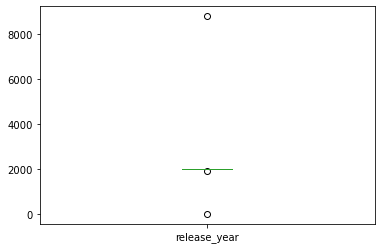

In [17]:
# Insight 1, 2, 3.

df.describe().plot(kind='box')

In [18]:
df['release_year'].value_counts().sort_values(ascending=False).head(5)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: release_year, dtype: int64

In [19]:
# df['release_year'].plot(kind='bar')

In [20]:
df['rel']

KeyError: 'rel'

In [21]:
# Insight 4

Total_Years_data = len(df['release_year'].unique())
Total_Years_data

74

In [22]:
# Insight 5

Total_Title_data = len(df['title'].unique())
Total_Title_data

8807

In [23]:
# Insight 6

Avg_mv_sh = Total_Title_data//Total_Years_data
Avg_mv_sh

119

# Observation for part 1.

Insight 1 : First movie/show was created in 1925.

Insight 2 : Last movie/show was created in 2021.

Insight 3 : IQR range is 2013-2019, where 2013 is 1st Quartile, 2017 is 2nd quartile, 2019 is 3rd quartile.

Insight 4 : We have total 74 years of data.

Insight 5 : We have total 8807 movies/shows.

Insight 6 : Average movies/shows per year is calculated as 119.



# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary  (10 Points)

In [24]:
# Insight 2.1
df.shape

(8807, 12)

In [25]:
# Insight 2.2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [26]:
# Insigt 2.3

Mask = df['cast'].apply(lambda x: str(x).split(', ')).to_list()
give_index = pd.DataFrame(Mask,index=df['director'])
dff = give_index.stack()
dff = pd.DataFrame(dff)
dff.reset_index(inplace=True)
dff.rename(columns={0:'cast'},inplace=True)
dff.drop('level_1',axis=1,inplace=True)



In [27]:
# Insigt 2.3

Top_MovieTVscast = dff 
Top_MovieTVscast = Top_MovieTVscast[Top_MovieTVscast['cast'] != 'nan']
Top_MovieTVscast.groupby('cast')['director'].count().sort_values(ascending=False).head(5)


cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Name: director, dtype: int64

In [28]:
# Insigt 2.4

e = pd.DataFrame(Mask,index=df['type'])
e = e.stack()
e = pd.DataFrame(e)
e.reset_index(inplace=True)
e.rename(columns={0:'cast'},inplace=True)
e.groupby('cast')['type'].count().sort_values(ascending=False)
e.drop('level_1',inplace=True,axis=1)



In [29]:
# Insigt 2.4

Movies_cast = e[e['type'] == 'Movie']


In [30]:
# Insigt 2.4

Movies_cast = Movies_cast[Movies_cast['cast'] != 'nan']
Movies_cast =pd.DataFrame(Movies_cast.value_counts().head(5))
Movies_cast.reset_index(inplace=True)
Movies_cast.rename(columns={0:'no_of_movies'},inplace=True)


In [31]:
# Insigt 2.4

Movies_cast

,type,cast,no_of_movies
0,Movie,Anupam Kher,42
1,Movie,Shah Rukh Khan,35
2,Movie,Naseeruddin Shah,32
3,Movie,Om Puri,30
4,Movie,Akshay Kumar,30


In [32]:
# Insigt 2.5

Tvshow_cast = e[e['type'] == 'TV Show']


In [33]:
# Insigt 2.5

Tvshow_cast = Tvshow_cast[Tvshow_cast['cast'] != 'nan']
TvShow_cast =pd.DataFrame(Tvshow_cast.value_counts().head(5))
TvShow_cast.reset_index(inplace=True)
TvShow_cast.rename(columns={0:'no_of_shows'},inplace=True)


In [34]:
# Insigt 2.5

TvShow_cast

,type,cast,no_of_shows
0,TV Show,Takahiro Sakurai,25
1,TV Show,Yuki Kaji,19
2,TV Show,Junichi Suwabe,17
3,TV Show,Daisuke Ono,17
4,TV Show,Ai Kayano,17


In [95]:
# Insigt 2.6
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [36]:
# Insigt 2.7
df.describe()  

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Observation for part 2.

Insight 2.1 : It states we have 8807 rows ans 12 columns.

Insight 2.2 : It reprsents diffrent types of all the attributes.

Insight 2.3 : Conversion of categorical attributes to 'category', which represents best actors according to directors.

Insight 2.4 : Represents top 5 actors specifically for movies.

Insight 2.5 : Represents top 5 actors specifically for tv shows.

Insight 2.6 : Missing values counts. 

Insight 2.7 : Statistical summary for the dataset.


# 3. Non-Graphical Analysis: Value counts and unique attributes  (10 Points)

In [37]:
# Insight 3.1

Total_Years = df['release_year'].unique()
np.sort(Total_Years)[::-1]
len(Total_Years)

74

In [38]:
# Insight 3.2
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [39]:
# Insight 3.3
Countrywise_Moviecount = df.groupby('country')['listed_in'].nunique().sort_values(ascending = False)
Countrywise_Moviecount = Countrywise_Moviecount.to_frame()
Countrywise_Moviecount.reset_index(inplace=True)



In [40]:
# Insight 3.3

Countrywise_Moviecount.head()

,country,listed_in
0,United States,310
1,United Kingdom,100
2,India,90
3,Canada,85
4,Japan,55


# extra

In [41]:
mv = df.loc[df['type'] == 'Movie']
tv = df.loc[df['type'] == 'TV Show']

In [42]:
mv = mv.groupby('country')['listed_in'].nunique().sort_values(ascending=False)
mv = pd.DataFrame(mv)
mv.reset_index(inplace=True)


In [43]:
mvv = mv 
mv=mv.head()
mv


,country,listed_in
0,United States,179
1,United Kingdom,63
2,India,62
3,Canada,53
4,"United Kingdom, United States",38


In [44]:
tv = tv.groupby('country')['listed_in'].nunique().sort_values(ascending=False)
tv = pd.DataFrame(tv)
tv.reset_index(inplace=True)

In [45]:
tvv = tv
tv=tv.head()
tv

,country,listed_in
0,United States,131
1,United Kingdom,37
2,Canada,32
3,Japan,30
4,India,28


In [46]:
merged_df = mv.merge(tv,on='country')


In [47]:
merged_df = merged_df.rename(columns={'listed_in_x':'Movies','listed_in_y':'TV Shows'})
merged_df

,country,Movies,TV Shows
0,United States,179,131
1,United Kingdom,63,37
2,India,62,28
3,Canada,53,32


In [48]:
TVs = df.loc[df['type'] == 'TV Show']
TVs = TVs.groupby('release_year')['listed_in'].nunique().sort_values(ascending=False)
TVs = pd.DataFrame(TVs)
TVs.reset_index(inplace=True)

In [49]:
d_m = df.loc[df['type'] == 'Movie']
d_m = d_m.groupby('release_year')['listed_in'].nunique().sort_values(ascending=False)
d_m = pd.DataFrame(d_m)
d_m.reset_index(inplace=True)

In [50]:
TVs.head(1)

,release_year,listed_in
0,2020,122


# extra end

In [51]:
# Insight 3.4

Countrywise_Movietypes = df.groupby('country')['listed_in'].unique()
Countrywise_Movietypes = Countrywise_Movietypes.to_frame()
Countrywise_Movietypes.reset_index().head()


,country,listed_in
0,", France, Algeria","[Dramas, Independent Movies, International Mov..."
1,", South Korea","[International TV Shows, TV Dramas]"
2,Argentina,"[Crime TV Shows, International TV Shows, Spani..."
3,"Argentina, Brazil, France, Poland, Germany, De...","[Dramas, International Movies, Thrillers]"
4,"Argentina, Chile","[Dramas, Independent Movies, International Mov..."


In [52]:
# Insight 3.5

Movie_Yearwise = df['release_year'].value_counts().sort_values(ascending=False)
Movie_Yearwise = pd.DataFrame(Movie_Yearwise)


In [53]:
# Insight 3.5

Movie_Yearwise.reset_index(inplace=True)


In [54]:
# Insight 3.5

Movie_Yearwise = Movie_Yearwise.rename(columns={'index' : 'Year','release_year' : 'Counts'})


In [55]:
# Insight 3.5

Movie_Yearwise.head()

,Year,Counts
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902


In [56]:
# Insight 3.6


Mask = df['cast'].apply(lambda x: str(x).split(', ')).to_list()
ty = pd.DataFrame(Mask,index=df['type'])
ty = ty.stack()
ty = pd.DataFrame(ty)
ty.reset_index(inplace=True)
ty.rename(columns={0:'cast'},inplace=True)
ty.drop('level_1',axis=1,inplace=True)



Mask = df['cast'].apply(lambda x: str(x).split(', ')).to_list()
co = pd.DataFrame(Mask,index=df['country'])
co = co.stack()
co = pd.DataFrame(co)
co.reset_index(inplace=True)
co.rename(columns={0:'cast'},inplace=True)
co.drop('level_1',axis=1,inplace=True)



# Master_Data = ty.merge(co,on='cast')
# Master_Data = Master_Data.dropna()
# Master_Data = Master_Data.loc[Master_Data['cast'] != 'nan']
# Master_Data


Master_Data = ty.merge(co,on='cast')
Master_Data = Master_Data.dropna()
Master_Data = Master_Data.loc[Master_Data['cast'] != 'nan']
Master_Data












,type,cast,country
680625,TV Show,Ama Qamata,South Africa
680626,TV Show,Khosi Ngema,South Africa
680627,TV Show,Gail Mabalane,South Africa
680628,TV Show,Thabang Molaba,South Africa
680629,TV Show,Thabang Molaba,South Africa
...,...,...,...
923086,Movie,Ryan Newman,United States
923087,Movie,Raaghav Chanana,India
923088,Movie,Malkeet Rauni,India
923089,Movie,Anita Shabdish,India


In [90]:
ty

,type,cast
0,Movie,nan
1,TV Show,Ama Qamata
2,TV Show,Khosi Ngema
3,TV Show,Gail Mabalane
4,TV Show,Thabang Molaba
...,...,...
64946,Movie,Manish Chaudhary
64947,Movie,Meghna Malik
64948,Movie,Malkeet Rauni
64949,Movie,Anita Shabdish


# Extra

In [57]:
O  = pd.DataFrame(Master_Data['country'].value_counts().head(5))
O

,country
United States,77654
India,41569
Japan,17259
United Kingdom,6323
Canada,4877


In [58]:
O1 = Master_Data[Master_Data['type'] == 'TV Show']
O2 = Master_Data[Master_Data['type'] == 'Movie']

O1 = O1.drop_duplicates()
O2 = O2.drop_duplicates()
O1
O4 = pd.DataFrame(O2['country'].value_counts().head(5))
O3 = pd.DataFrame(O1['country'].value_counts().head(5))

O4
O3

,country
United States,4586
United Kingdom,1054
Japan,1002
South Korea,964
Canada,544


In [59]:
O3 = O3.reset_index()
O4 = O4.reset_index()

In [60]:
O3 = O3.rename(columns={'index':'country','country':'TV Show'})
O4 = O4.rename(columns={'index':'country','country':'Movie'})


In [61]:
O4
O3

,country,TV Show
0,United States,4586
1,United Kingdom,1054
2,Japan,1002
3,South Korea,964
4,Canada,544


In [62]:
O5 = O4.merge(O3,on='country')
O5

,country,Movie,TV Show
0,United States,9435,4586
1,United Kingdom,1013,1054
2,Canada,760,544


In [63]:
# O5.plot

In [64]:
# O5.set_index('country').plot(kind='bar',figsize=(7,4))


In [65]:
# merged_df.set_index('country').plot(kind='bar',figsize=(7,4))
# plt.title("Top 4 countries with most Movies/TV Shows")
# plt.show()
# a=a

# EXTRA END

In [66]:
# Insight 3.6


Master_Data_mov = Master_Data.loc[Master_Data['type'] == 'Movie']
Master_Data_mov = pd.DataFrame(Master_Data_mov.groupby('country')['cast'].nunique().sort_values(ascending=False).head(4))
Master_Data_mov = Master_Data_mov.reset_index()
Master_Data_mov 






M_MD = Master_Data[Master_Data['type'] == 'Movie']

M_MD1 = M_MD[M_MD['country'] == 'United States']
USA_cast = pd.DataFrame(M_MD1['cast'].value_counts().head(3))
USA_cast = USA_cast.reset_index()
USA_cast = USA_cast.rename(columns={'index':'USA Actors','cast':'Movies'})

M_MD2 = M_MD[M_MD['country'] == 'India']
India_cast = pd.DataFrame(M_MD2['cast'].value_counts().head(3))
India_cast = India_cast.reset_index()
India_cast = India_cast.rename(columns={'index':'India Actors','cast':'Movies'})

M_MD3 = M_MD[M_MD['country'] == 'United Kingdom']
UK_cast = pd.DataFrame(M_MD3['cast'].value_counts().head(3))
UK_cast = UK_cast.reset_index()
UK_cast = UK_cast.rename(columns={'index':'UK Actors','cast':'Movies'})

M_MD4 = M_MD[M_MD['country'] == 'Canada']
Canada_cast = pd.DataFrame(M_MD4['cast'].value_counts().head(3))
Canada_cast = Canada_cast.reset_index()
Canada_cast = Canada_cast.rename(columns={'index':'Canada Actors','cast':'Movies'})




In [67]:
Master_Data_movie = Master_Data_mov.rename(columns={'cast':'Movie Cast'})

In [68]:
USA_cast
India_cast
UK_cast
Canada_cast


,Canada Actors,Movies
0,Robb Wells,154
1,John Paul Tremblay,140
2,John Dunsworth,90


In [69]:
Master_Data_movie

,country,Movie Cast
0,United States,9435
1,India,3393
2,United Kingdom,1013
3,Canada,760


In [70]:
# Insight 3.7


Master_Data_tv = Master_Data.loc[Master_Data['type'] == 'TV Show']
Master_Data_tv = pd.DataFrame(Master_Data_tv.groupby('country')['cast'].nunique().sort_values(ascending=False).head(4))
Master_Data_tv = Master_Data_tv.reset_index()
Master_Data_tv








T_MD = Master_Data[Master_Data['type'] == 'TV Show']

T_MD1 = T_MD[T_MD['country'] == 'United States']
USA_cast_t = pd.DataFrame(T_MD1['cast'].value_counts().head(3))
USA_cast_t = USA_cast_t.reset_index()
USA_cast_t = USA_cast_t.rename(columns={'index':'USA Actors','cast':'Tv Shows'})



T_MD2 = T_MD[T_MD['country'] == 'United Kingdom']
UK_cast_t = pd.DataFrame(T_MD2['cast'].value_counts().head(3))
UK_cast_t = UK_cast_t.reset_index()
UK_cast_t = UK_cast_t.rename(columns={'index':'UK Actors','cast':'Tv Shows'})



T_MD3 = T_MD[T_MD['country'] == 'Japan']
Japan_cast_t = pd.DataFrame(T_MD3['cast'].value_counts().head(3))
Japan_cast_t = Japan_cast_t.reset_index()
Japan_cast_t = Japan_cast_t.rename(columns={'index':'Japan Actors','cast':'Tv Shows'})



T_MD4 = T_MD[T_MD['country'] == 'South Korea']
SK_cast_t = pd.DataFrame(T_MD4['cast'].value_counts().head(3))
SK_cast_t = SK_cast_t.reset_index()
SK_cast_t = SK_cast_t.rename(columns={'index':'S Korea Actors','cast':'Tv Shows'})




In [71]:
Master_Data_tvs = Master_Data_tv.rename(columns={'cast':'TV Show Cast'})


In [72]:
Master_Data_tvs

,country,TV Show Cast
0,United States,4586
1,United Kingdom,1054
2,Japan,1002
3,South Korea,964


In [73]:
USA_cast_t
UK_cast_t
Japan_cast_t
SK_cast_t

,S Korea Actors,Tv Shows
0,Sung Dong-il,30
1,Cho Seong-ha,25
2,Kim Won-hae,25


# Observations for part 3.

Insight 3.1 : We have 74 years of data.

Insight 3.2 : TV Shows are nearly 1/3rd of Movies created in 74 years.

Insight 3.3 : Country wise movies/tv shows counts, which concludes United States has max movies.

Extra : Top 4 countries are extracted here specifically on the basis of movie counts and tv shows counts seperated.

Insight 3.4 : Types of movies/tv shows that are created country wise.

Insight 3.5 : Year wise movie count, which concludes most of the movies were created on 2018.





# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

In [74]:
d_m = d_m.rename(columns={'listed_in':'Frequencies'})
TVs = TVs.rename(columns={'listed_in':'Frequencies'})

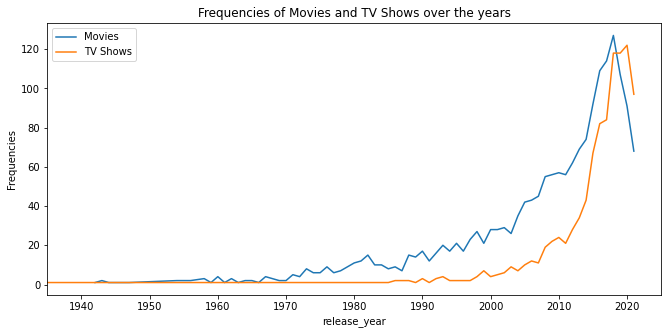

In [75]:
# Insight 4.1

plt.figure(figsize=(11,5))
plt.xlim([1935,2025])
sns.lineplot(x = d_m['release_year'], y =d_m['Frequencies'],legend=False,label ='Movies')
sns.lineplot(x = TVs['release_year'], y =TVs['Frequencies'],legend=False, label='TV Shows')
plt.xlim([1935,2025])
plt.title('Frequencies of Movies and TV Shows over the years')
plt.legend()
plt.show()

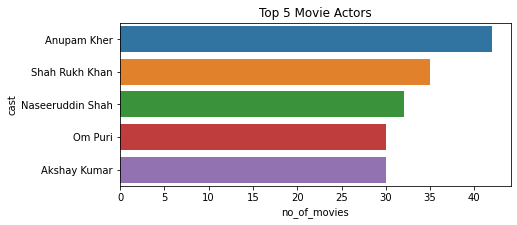

In [76]:
# Insight 4.2

plt.figure(figsize=(7,3))
sns.barplot(x='no_of_movies',y='cast',data=Movies_cast)
plt.title('Top 5 Movie Actors')
plt.show()

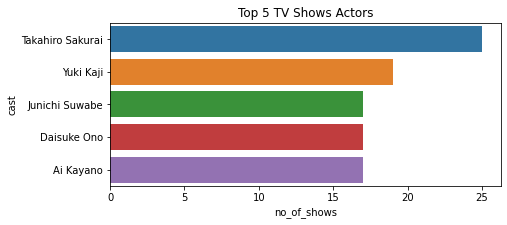

In [77]:
# Insight 4.3

plt.figure(figsize=(7,3))
sns.barplot(x='no_of_shows',y='cast',data=TvShow_cast)
plt.title('Top 5 TV Shows Actors')
plt.show()


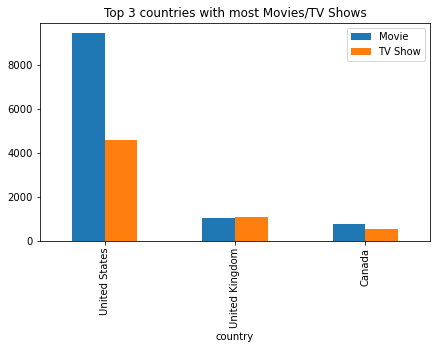

In [78]:
# Insight 4.4

O5.set_index('country').plot(kind='bar',figsize=(7,4))
plt.title("Top 3 countries with most Movies/TV Shows")
plt.show()

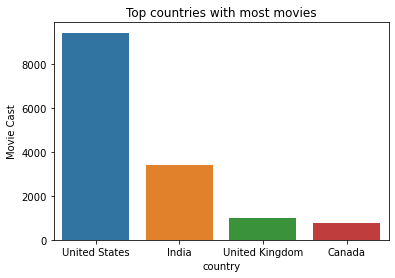

In [79]:
# Insight 4.5

sns.barplot(data=Master_Data_movie,y='Movie Cast',x='country')
plt.title("Top countries with most movies")
plt.show()


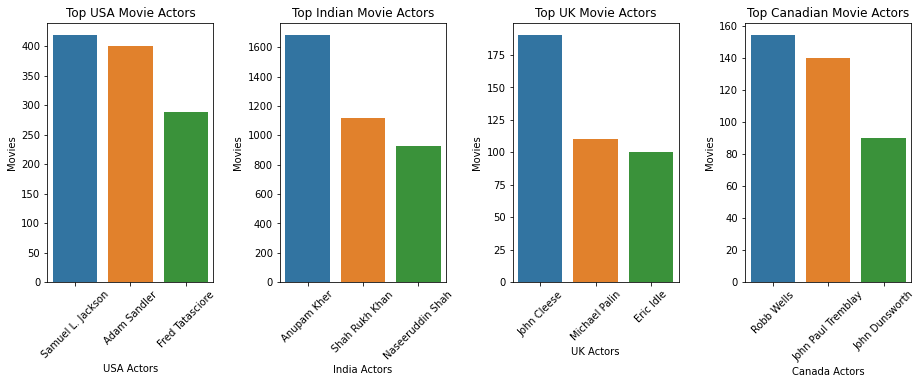

In [80]:
# Insight 4.6

plt.subplot(1,4,1)
sns.barplot(data=USA_cast,x='USA Actors',y='Movies')
plt.xticks(rotation=45)
plt.title('Top USA Movie Actors')



plt.subplot(1,4,2)
sns.barplot(data=India_cast,x='India Actors',y='Movies')
plt.xticks(rotation=45)
plt.title('Top Indian Movie Actors')

plt.subplot(1,4,3)
sns.barplot(data=UK_cast,x='UK Actors',y='Movies')
plt.xticks(rotation=45)
plt.title('Top UK Movie Actors')


plt.subplot(1,4,4)
sns.barplot(data=Canada_cast,x='Canada Actors',y='Movies')
plt.xticks(rotation=45)
plt.title('Top Canadian Movie Actors')


plt.subplots_adjust(left=1,bottom=.1,right=3,top=1, wspace=0.4, hspace=0.4)
plt.show()


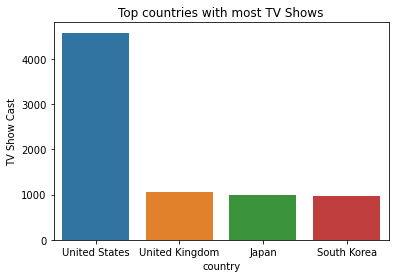

In [81]:
# Insight 4.7

sns.barplot(data=Master_Data_tvs,y='TV Show Cast',x='country')
plt.title("Top countries with most TV Shows")
plt.show()

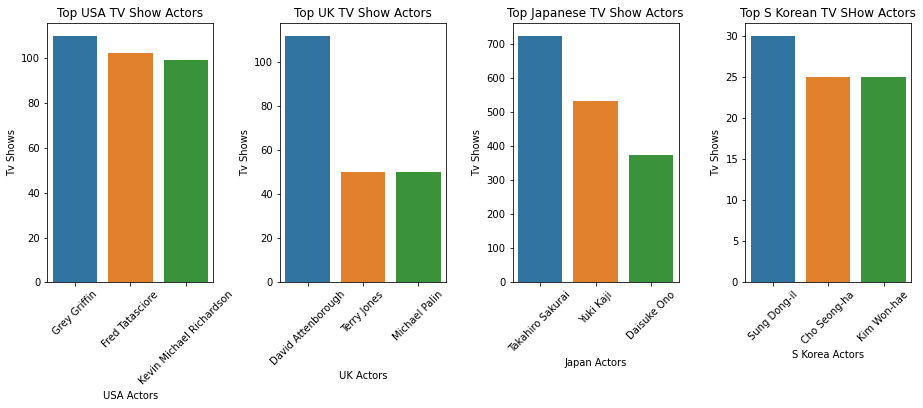

In [82]:
# Insight 4.8

plt.subplot(1,4,1)
sns.barplot(data=USA_cast_t,x='USA Actors',y='Tv Shows')
plt.xticks(rotation=45)
plt.title('Top USA TV Show Actors')



plt.subplot(1,4,2)
sns.barplot(data=UK_cast_t,x='UK Actors',y='Tv Shows')
plt.xticks(rotation=45)
plt.title('Top UK TV Show Actors')

plt.subplot(1,4,3)
sns.barplot(data=Japan_cast_t,x='Japan Actors',y='Tv Shows')
plt.xticks(rotation=45)
plt.title('Top Japanese TV Show Actors')


plt.subplot(1,4,4)
sns.barplot(data=SK_cast_t,x='S Korea Actors',y='Tv Shows')
plt.xticks(rotation=45)
plt.title('Top S Korean TV SHow Actors')


plt.subplots_adjust(left=1,bottom=.1,right=3,top=1, wspace=0.4, hspace=0.4)
plt.show()


In [83]:
Master_Data_movie

,country,Movie Cast
0,United States,9435
1,India,3393
2,United Kingdom,1013
3,Canada,760


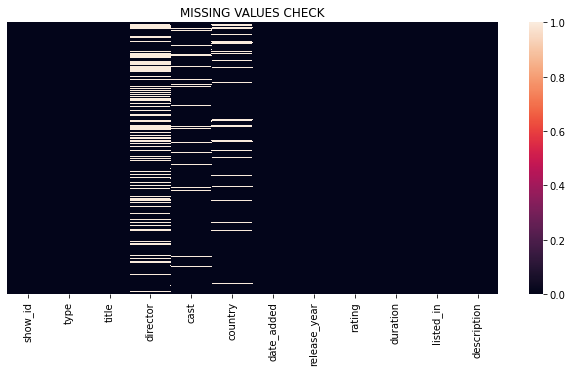

In [84]:
# Insight 4.5

plt.figure(figsize=(11,5))
sns.heatmap(df.isnull(),yticklabels=False)
plt.title('MISSING VALUES CHECK')
plt.show()

# Observations for part 4.

Insight 4.1 : The plot represents how rapidly tv shows and movies count increased over years.

Insight 4.2 : The plot represents best actor on the basis of number of movies they are casted.

Insight 4.3 : The plot represents best actor on the basis of number of tv shows they are casted.

Insight 4.4 : Top 4 countries which have maximum number of movies and tv shows.

Insight 4.5 : The plot represents all the correlation between null values, in simple words columnwise every null values present.









# 5. Missing Value & Outlier check (Treatment optional) (10 Points)

In [85]:
# Insight 5.1.1

Percentage_of_nan = df.isnull().mean()*100
Percentage_of_nan

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [86]:
# Insight 5.1.2

df_mod = df
df_mod = df_mod.fillna('Missing')
df_mod.isnull().mean()*100


show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [87]:
# Insight 5.2.1

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [88]:
# Insight 5.2.2

Total_years = len(Total_Years)
Total_movies = df['type'].count()
Avg_mov_shows = Total_movies//Total_years
print('The average movies/shows per year is',Avg_mov_shows)

The average movies/shows per year is 119


In [89]:
# Insight 5.2.3

Outliers = df['release_year'].value_counts().sort_values(ascending=False).head(9)
Outliers

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
Name: release_year, dtype: int64

# Observations for part 5.

Insight 5.1.1 : 'Percentage_of_nan' represents the total percentage of missing values per columns.

Insight 5.1.2 : As 29% of the directors data is missing, instead of deletion, those values are cagorised as missing.

Insight 5.2.1 : From this statistical summary we can see that upto 2013 only 25% of movies are created rest 75% are created between 2013 - 2021 .

Insight 5.2.2 : Average movie/shows per year is calculated in Insight 5.2.2.

Insight 5.2.3 : If the average movies/shows per year is 119, we can clearly see top outliers ie 2013-2020.






# 6. Insights based on Non-Graphical and Visual Analysis (10 Points).

6.1 Comments on the range of attributes.


Insight 6.1 : From the range of attributes 3 columns have missing values, where directors column has the most which is 29% and rest cast and country has second most missing values of approx 9%.
( Reference : 5.1.1 )


6.2 Comments on the distribution of the variables and relationship between them.


Insight 6.2 : The correlation of NaN values are represented by heatmap, the zero correlations are coloured dark and represent present values, where as positive correlations are colored light and represens the missing values. 
( Reference : Insight 4.5 )


6.3 Comments for each univariate and bivariate plot.


 Insight 6.3.1 : Two Univariate plots of top actors for movies and tv shows were plotted. Top actors were choosen on the basis of the   most casted in movies and tv shows.
 ( Reference : Insight 4.2, Insight 4.3 )




 
 Insight 6.3.2 : A Bivarriate plot is plotted to compare  both tv shows and movies with each other.
 ( Reference : Insight 4.1 )


# 7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

Patterns:

 
Insight 7.1 : USA and UK are appearing both in top movies and tv shows list.
( Reference : Insight 4.5, Insight 4.7 )



Insight 7.2 : When it comes to movies Indian Actors are most casted.
( Reference : Insight 4.6 )



 
Insight 7.3 : When it comes to tv shows Japanese Actors are most casted.
( Reference : Insight 4.8 )



 
Insight 7.4 : Exponential growth of movies and tv shows has been seen after year 2010. 
 ( Reference : Insight 4.1 )
 
 
 
 Insight 7.5 : USA Tops the list in most movies and tv shows both. 
 ( Reference : Insight 4.4 )

# 8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

Recommendations:

Recommendation 1 : As USA and UK are both in top movies and tv shows list, netflix should priorly focus on this two countries.
( Reference : Insight 7.1 )


Recommendation 2 : As Indian actors are mostly casted in case of movies and also India falls on top countries list, netflix should look forward to expand on India for movies catagory.
( Reference : Insight Insight 4.6,  Insight 4.5 )



Recommendation 3 : As more actors are casted for specifically tv shows in Japan and South Korea, netflix should focus on Japan and South Korea specifically for tv shows catagory.
( Reference : Insight 4.8  )



Recommendation 4 : Keeping in sight 'Frequencies of Movies and TV Shows over the years' plot, netflix should focus more on movies over tv shows as movies were clearly dominating over the years.
( Reference : Insight 4.1  )



Recommendation 5 : If it is said to choose 1 country on both movies and tv shows catagory, netflix should pick USA, as USA tops the list of both movies and tv shows by huge margin.
( Reference : Insight 4.4  )







